<a href="https://colab.research.google.com/github/dhyu12/yolov3/blob/master/PyTorch_YOLOv3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch-YOLOv3

- 깃헙 원문링크: https://github.com/eriklindernoren/PyTorch-YOLOv3
- PyTorch 로 구현한 YOLOv3 를 Colaboratory 에서 실행해보자. 
- Coloaboratory 의 런타임 >> 런타임 유형변경에서 GPU 사용을 체크하는 것을 잊지말자

## 우선 git clone


In [1]:
!git clone https://github.com/eriklindernoren/PyTorch-YOLOv3

Cloning into 'PyTorch-YOLOv3'...
remote: Enumerating objects: 724, done.
remote: Total 724 (delta 0), reused 0 (delta 0), pack-reused 724
Receiving objects: 100% (724/724), 16.18 MiB | 15.04 MiB/s, done.
Resolving deltas: 100% (411/411), done.


## 폴더 이동후 필요한 package 를 설치해준다

In [2]:
cd PyTorch-YOLOv3/

/content/PyTorch-YOLOv3


In [3]:
!pip3 install -r requirements.txt

  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=7d73dd793bdaec9afd01c52d306033e214090418a47aed6c7a97c468745ac298
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables


## 에러 발생. 
- torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
- Pillow 버전이 맞지 않는다고 하니 기존의 Pillow 를 uninstall 한 다음 최신으로 install 해준다. 

In [59]:
!pip3 uninstall Pillow -y

Uninstalling Pillow-7.0.0:
  Successfully uninstalled Pillow-7.0.0


In [60]:
!pip3 install Pillow

     |████████████████████████████████| 2.2MB 6.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


## 이미 학습 완료한 weight 를 다운로드 받는다

In [28]:
cd weights/

/content/PyTorch-YOLOv3/weights


In [29]:
# 스크립트 내용을 한 번 볼까? 
!cat /content/PyTorch-YOLOv3/weights/download_weights.sh

#!/bin/bash
# Download weights for vanilla YOLOv3
wget -c https://pjreddie.com/media/files/yolov3.weights
# # Download weights for tiny YOLOv3
wget -c https://pjreddie.com/media/files/yolov3-tiny.weights
# Download weights for backbone network
wget -c https://pjreddie.com/media/files/darknet53.conv.74


In [30]:
!bash download_weights.sh

--2020-08-27 16:25:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  6.85MB/s    in 52s     

2020-08-27 16:26:08 (4.59 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2020-08-27 16:26:08--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  3.27MB/s    in 9.8s    

2020-08-27 16:26:18 (3.45 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]

--202

# 이제 예측을 해보자 
- 상위 폴더로 이동후 
- detect.py 파일을 실행하자
- 이때 --image_folder 옵션에 이미지들이 들어있는 폴더를 지정해주면 된다. 

In [6]:
cd ..

/content/PyTorch-YOLOv3


In [7]:
cd data/

/content/PyTorch-YOLOv3/data


## 기본 제공하는 sample 폴더 내용을 확인해보자

## 이미지 하나를 뿌려보자

## YOLO가 예측하여 사각형을 그린 이미지를 확인해보자


# 내 Drive 내의 이미지에 접근해보자. 
- Colaboratory 에 파일을 올리는 방법은 여러가지가 있는데 
- 여기서는 google Drive 에 접근하여 미리 올려둔 이미지를 이용하도록 한다. 

### 아래 구글 계정 인증은 이상하게 한번에 안된다. 
- 한번 에러나고 나면
- 다시 실행하자 

In [32]:
cd /content/PyTorch-YOLOv3/

/content/PyTorch-YOLOv3


## 아래 스크립트는 그냥 실행하자.
- 링크가 나오면 클릭하여 구글인증을 하고 
- Verification code 를 입력해주면 된다. 
- 오류가 나면 이 셀을 다시 실행해서 반복해주면 된다

## 디렉토리를 만들고 mount 해주면 쓸 수 있게 된다. 
- drive 폴더로 들어가보면 인증한 구글계정의 구글 드라이브 라는 것을 알 수 있다.

## 이제 예측을 해보자 
- 예를 들어 google drive 의 test_images 라는 폴더에 테스트할 jpg 이미지들을 넣어두었다면
- 아래와 같이 predict 해주면 된다. 

## 마찬가지로 output 폴더에 가보면 결과를 확인할 수 있다. 

In [77]:
 !python3 train.py

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Total loss 1.9152562618255615
---- ETA 0:00:04.814894
[W IndexingUtils.h:20] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:20] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:20] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:20] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:20] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:20] Warning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (function expandTensors)
[W IndexingUtils.h:20] Warni

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [78]:
!python3 detect.py --image_folder data/custom_samples/

Namespace(batch_size=1, checkpoint_model=None, class_path='data/custom/classes.names', conf_thres=0.8, image_folder='data/custom_samples/', img_size=416, model_def='config/yolov3_custom.cfg', n_cpu=0, nms_thres=0.4, weights_path='/content/drive/My Drive/weight/yolov3_ckpt_99.pth')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.156464
	+ Batch 1, Inference Time: 0:00:00.147944
	+ Batch 2, Inference Time: 0:00:00.081680
	+ Batch 3, Inference Time: 0:00:00.079289
	+ Batch 4, Inference Time: 0:00:00.080686

Saving images:
(0) Image: 'data/custom_samples/Plus button.jpg'
(1) Image: 'data/custom_samples/Wallpaper-IngridMika-PlusSign-1a.jpg'
(2) Image: 'data/custom_samples/_02dbb51691aeb264.jpg'
	+ Label: add, Conf: 0.98845
(3) Image: 'data/custom_samples/_59faaa76412f3daf.jpg'
	+ Label: add, Conf: 0.80612
(4) Image: 'data/custom_samples/다운로드 (1).jpg'
	+ Label: add, Conf: 0.91675


In [81]:
ls -al /content/PyTorch-YOLOv3/output/

total 192
drwxr-xr-x  2 root root   4096 Aug 27 18:16  ./
drwxr-xr-x 12 root root   4096 Aug 27 18:13  ../
-rw-r--r--  1 root root  13431 Aug 27 18:41  _02dbb51691aeb264.png
-rw-r--r--  1 root root  44565 Aug 27 18:41 '다운로드 (1).png'
-rw-r--r--  1 root root   9440 Aug 27 18:41  _59faaa76412f3daf.png
-rw-r--r--  1 root root 101683 Aug 27 18:41 'Plus button.png'
-rw-r--r--  1 root root   9732 Aug 27 18:41  Wallpaper-IngridMika-PlusSign-1a.png


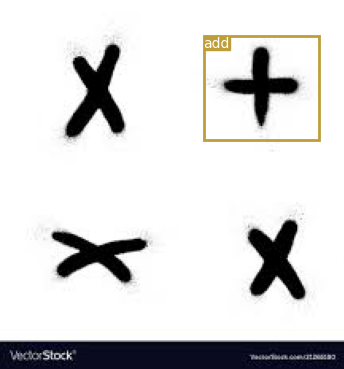

In [83]:
from IPython.display import Image
Image('/content/PyTorch-YOLOv3/output/다운로드 (1).png')